In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load clinical data as table2 and gene expression data as gexp
## Match patien samples in clincal and gexp data

In [24]:
# load clinical data
table2 = pd.read_excel('i-spy2-tables2.xlsx')
table2.set_index('Patient Identifier', inplace = True)
table2.head()

,Arm,Arm (short name),pCR,HR,HER2,MP2,Immune+,DRD+,BP-subtype,Receptor Subtype,...,IGF1R_dat,TIE2.Y992,Mod10_ECM,RPL24_dat,LYMPHS_PCA_16704732,Luminal_Index,ER_PGR_avg,PAM50.Subtype,TNBCtype_7class,TNBC_BB_4class
Patient Identifier,,,,,,,,,,,,,,,,,,,,,
932200,Paclitaxel,Ctr,0,1,0,1,1,1.0,Basal-type,HR+HER2-,...,0.78650,0.0133,-0.1007,1.6360,0.69040,-1.0310,1.1120,Basal,NaN,NaN
579881,Paclitaxel,Ctr,0,1,0,0,1,0.0,Luminal-type,HR+HER2-,...,1.90700,-0.7471,-0.5859,0.1221,1.36200,1.8350,1.4250,LumB,NaN,NaN
660915,Paclitaxel + Neratinib,N,0,1,0,1,1,NaN,NaN,HR+HER2-,...,-0.02479,-0.4198,0.1212,0.5347,0.40240,NaN,0.3748,Basal,NaN,NaN
628692,Paclitaxel + Neratinib,N,0,1,0,0,0,0.0,Luminal-type,HR+HER2-,...,0.89820,-0.6033,0.8891,0.9231,-0.47970,0.3793,0.9550,LumA,NaN,NaN
894491,Paclitaxel + ABT 888 + Carboplatin,VC,0,1,0,1,1,0.0,Luminal-type,HR+HER2-,...,-0.07212,NaN,-1.6460,1.1220,0.07122,0.2444,0.9055,LumB,NaN,NaN


In [25]:
# get all arms in the data
arm_short_name = table2['Arm (short name)'].value_counts()
arm = [table2.loc[table2['Arm (short name)'] == a,'Arm'].iloc[0]  for a in arm_short_name.index]
arm_short_name = arm_short_name.to_frame()
arm_short_name['Arm'] = arm
arm_short_name = arm_short_name.iloc[:,[1,0]]
print(arm_short_name)

                                                    Arm  count
Arm (short name)                                              
Ctr                                          Paclitaxel    210
AMG386                             Paclitaxel + AMG 386    134
N                                Paclitaxel + Neratinib    114
Ganitumab                        Paclitaxel + Ganitumab    106
MK2206               Paclitaxel + MK-2206 + Trastuzumab     94
Ganetespib                      Paclitaxel + Ganetespib     93
VC                   Paclitaxel + ABT 888 + Carboplatin     71
Pembro                       Paclitaxel + Pembrolizumab     69
TDM1/P                               T-DM1 + Pertuzumab     52
Pertuzumab        Paclitaxel + Pertuzumab + Trastuzumab     44


In [26]:
#load gene expression data
filename = 'GSE194040_ISPY2ResID_AgilentGeneExp_990_FrshFrzn_meanCol_geneLevel_n988.txt'
gexp = pd.read_csv(filename, sep = '\t')
print(gexp.shape)
gexp.head()

(19134, 988)


,756412,111881,451816,243836,402265,611662,139137,685753,627981,108939,...,500826,194024,832056,663197,644186,962664,950131,492612,792412,586091
FAM174B,10.4810,11.2120,11.3760,9.3334,10.6350,9.5352,10.0810,9.0438,10.0950,10.4850,...,9.4485,8.3849,10.5372,8.1796,10.7535,7.9763,11.0379,11.0509,8.4270,8.8056
SV2B,7.2935,6.7711,6.2116,6.2349,7.2393,8.8680,6.3698,7.5780,6.6479,6.7605,...,7.1107,6.3422,8.3568,7.5555,6.9130,7.0874,7.9024,8.6330,6.9983,6.9430
RBPMS2,4.9549,5.4971,5.5040,5.9898,5.8276,5.8939,5.2725,5.9047,5.9849,6.6903,...,7.4060,4.5929,5.4540,6.4038,5.0250,5.9365,5.7008,6.8842,6.9608,5.9667
AVEN,10.5480,9.9724,9.0909,10.3670,9.9440,10.3300,10.5930,10.6990,10.8660,10.4700,...,10.2830,10.3401,10.8359,10.3805,10.0693,10.7457,10.0268,9.1107,10.2239,10.2747
PRM1,4.8203,5.0653,5.4756,5.4334,6.0464,6.1098,5.6362,5.4049,5.5527,6.1639,...,6.1907,5.0174,4.8678,6.7286,5.0853,5.4491,4.9420,5.3303,6.1780,4.7458


In [27]:
# remove a redudant sample
# match sample IDs in clinical and gene expression data
gexp.drop(['629606-GPL16233'], axis = 1, inplace = True)
gexp.rename(columns = {'629606-GPL20078': '629606'}, inplace = True)
temp = list(gexp.columns.astype('int64'))
gexp.columns = temp
patient_matched = [patient for patient in gexp.columns if patient in table2.index]
len(patient_matched)

987

In [28]:
#check four hormone recpetor genes ERBB2 (HER2), ESR1, ESR2, and PGR
#HR is another gene not related to hormone receptor
HRHER2_index = [np.where(gexp.index.values == gene ) for gene in ['HR','ERBB2', 'ESR1', 'ESR2', 'PGR']]
HRHER2_index

[(array([3605]),),
 (array([12944]),),
 (array([12983]),),
 (array([12984]),),
 (array([15930]),)]

In [29]:
table2_matched = table2.loc[patient_matched]
table2_matched

,Arm,Arm (short name),pCR,HR,HER2,MP2,Immune+,DRD+,BP-subtype,Receptor Subtype,...,IGF1R_dat,TIE2.Y992,Mod10_ECM,RPL24_dat,LYMPHS_PCA_16704732,Luminal_Index,ER_PGR_avg,PAM50.Subtype,TNBCtype_7class,TNBC_BB_4class
Patient Identifier,,,,,,,,,,,,,,,,,,,,,
756412,Paclitaxel + ABT 888 + Carboplatin,VC,0,1,0,0,0,0.0,Luminal-type,HR+HER2-,...,-0.36690,-0.6964,-1.0090,0.20600,0.6421,1.6580,1.1530,LumA,NaN,NaN
111881,Paclitaxel + Neratinib,N,1,1,1,1,0,0.0,HER2-type,HR+HER2+,...,-0.10550,-0.5253,-0.0860,0.08368,0.4827,0.3146,0.2331,LumB,NaN,NaN
451816,Paclitaxel + ABT 888 + Carboplatin,VC,0,1,0,0,0,0.0,Luminal-type,HR+HER2-,...,0.22040,NaN,-1.2060,0.76800,1.4220,1.7790,0.0402,LumB,NaN,NaN
243836,Paclitaxel + Neratinib,N,1,1,0,1,0,1.0,Basal-type,HR+HER2-,...,-0.88260,-0.6259,0.7970,-0.63910,-1.1630,-1.0310,-1.1570,Basal,NaN,NaN
402265,Paclitaxel + Trastuzumab,Ctr,0,1,1,0,0,0.0,HER2-type,HR+HER2+,...,0.02677,-0.1112,1.0830,0.19180,-0.9097,0.1516,0.7793,Her2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962664,Paclitaxel,Ctr,0,0,0,1,1,1.0,Basal-type,TN,...,-0.63170,NaN,-0.2265,0.02122,-0.1880,-0.7139,-1.2880,Basal,IM,BLIA
950131,Paclitaxel,Ctr,1,1,0,0,1,0.0,Luminal-type,HR+HER2-,...,-0.89620,NaN,-0.6298,0.91400,1.9080,1.8290,0.7286,LumB,NaN,NaN
492612,Paclitaxel,Ctr,0,0,0,1,1,1.0,Basal-type,TN,...,0.37190,NaN,-0.8897,-1.85800,-1.0260,-0.1378,-1.2170,Basal,IM,BLIS


## Find the number of samples in each arm and in each HR/HER2 catetories

In [30]:
# Find the number of samples in each arm
n_samples = []
for a in arm_short_name.index:
    table2_1arm = table2.loc[table2_matched['Arm (short name)']== a]
    n_pCR = table2_1arm['pCR'].sum()
    
    temp1 = table2_1arm.loc[table2_1arm['HR'] == 1]
    temp2 = temp1.loc[temp1['HER2'] == 1]
    n_HRp_HER2p = temp2.shape[0]
    n_HRp_HER2p_pCR = temp2['pCR'].sum()

    temp2 = temp1.loc[temp1['HER2'] == 0]
    n_HRp_HER2n = temp2.shape[0]
    n_HRp_HER2n_pCR = temp2['pCR'].sum()
    
    temp1 = table2_1arm.loc[table2_1arm['HR'] == 0]
    temp2 = temp1.loc[temp1['HER2'] == 1]
    n_HRn_HER2p = temp2.shape[0]
    n_HRn_HER2p_pCR = temp2['pCR'].sum()

    temp2 = temp1.loc[temp1['HER2'] == 0]
    n_HRn_HER2n = temp2.shape[0]
    n_HRn_HER2n_pCR = temp2['pCR'].sum()

    temp = [n_pCR, n_HRp_HER2p, n_HRp_HER2p_pCR, n_HRp_HER2n, n_HRp_HER2n_pCR, n_HRn_HER2p, n_HRn_HER2p_pCR, n_HRn_HER2n, n_HRn_HER2n_pCR]
    n_samples.append(temp)

n_samples = np.array(n_samples)
n_samples
new_columns = ['pCR', 'HR+HER2+', 'HR+HER2+pCR', 'HR+HER2-', 'HR+HER2-pCR', 'HR-HER2+', 'HR-HER2+pCR', 'HR-HER2-', 'HR-HER2-pCR']
for i, c in enumerate(new_columns):
    arm_short_name[c] = n_samples[:,i]
arm_short_name

,Arm,count,pCR,HR+HER2+,HR+HER2+pCR,HR+HER2-,HR+HER2-pCR,HR-HER2+,HR-HER2+pCR,HR-HER2-,HR-HER2-pCR
Arm (short name),,,,,,,,,,,
Ctr,Paclitaxel,210,38,19,3,94,14,12,5,85,16
AMG386,Paclitaxel + AMG 386,134,40,15,5,62,10,4,2,53,23
N,Paclitaxel + Neratinib,114,41,42,13,17,3,23,13,32,12
Ganitumab,Paclitaxel + Ganitumab,106,24,0,0,58,8,0,0,48,16
MK2206,Paclitaxel + MK-2206 + Trastuzumab,94,35,16,5,28,5,18,12,32,13
Ganetespib,Paclitaxel + Ganetespib,93,25,0,0,48,6,0,0,45,19
VC,Paclitaxel + ABT 888 + Carboplatin,71,27,0,0,32,5,0,0,39,22
Pembro,Paclitaxel + Pembrolizumab,69,31,0,0,40,12,0,0,29,19
TDM1/P,T-DM1 + Pertuzumab,52,30,35,18,0,0,17,12,0,0


## Explore gene expression data

In [31]:
# remove genes with null expression values
gexp = gexp.T
gexp_copy = gexp
for col in gexp.columns:
    if gexp[col].isnull().values.any():
        gexp.drop([col],axis = 1, inplace = True)
gexp.shape

(987, 17993)

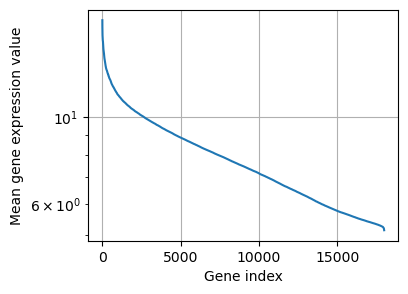

In [32]:
# plot mean gene expression values
gexp_mean = gexp.mean(axis = 0)
gexp_mean_sorted = gexp_mean.sort_values(ascending = False)
fig, axs = plt.subplots(1,1, figsize = (4,3))
axs.semilogy(range(len(gexp_mean_sorted)),gexp_mean_sorted)
axs.set_xlabel('Gene index') 
axs.set_ylabel('Mean gene expression value')
axs.grid()

[13.71915464907465, 0.5270111086075571, 0.07494941585672567]


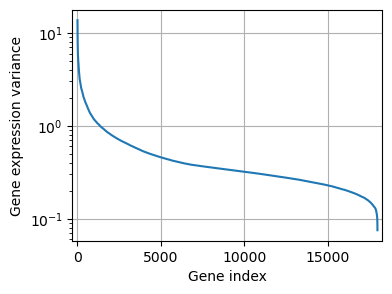

In [36]:
# plot the variance of gene expression values
gexp_var = gexp.var(axis = 0)
gexp_var_sorted = gexp_var.sort_values(ascending = False)
fig, axs = plt.subplots(1, figsize = (4,3))
axs.semilogy(range(len(gexp_var_sorted)),gexp_var_sorted)
axs.set_ylabel('Gene expression variance')
axs.set_xlabel('Gene index')
axs.set_xlim([-300,len(gexp_var_sorted)+300])
axs.grid()
temp = [gexp_var_sorted.iloc[0], gexp_var_sorted.iloc[3999], gexp_var_sorted.iloc[-1]]
print(temp)

## Save expression values of top 4000 genes with largest variance and clinical data

In [40]:
# Extract top 4000 genes with highest variance
gexp4000 = gexp[gexp_var_sorted.index[:4000]]

In [41]:
# check if HR/HER2 genes are in the top 4000 genes
HRHER2_index = [np.where(gexp4000.columns.values == gene ) for gene in ['HR','ERBB2', 'ESR1', 'ESR2', 'PGR']]
HRHER2_index

[(array([2172]),),
 (array([816]),),
 (array([517]),),
 (array([], dtype=int64),),
 (array([664]),)]

In [42]:
#save expression values of top 4000 genes and clinical data
gexp4000.to_csv('data_gexp4000.csv')
table2_matched.to_csv('data_table2.csv')
arm_short_name.to_csv('data_arm_samples.csv')